### 텐서 만들기

In [1]:
def describe(x):
    print('타입: {}'.format(x.type()))
    print('크기: {}'.format(x.shape))
    print('값: {}'.format(x))
    print()


In [2]:
import torch

describe(torch.Tensor(2, 3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0., 0., 0.],
        [0., 0., 0.]])



In [3]:
# 랜덤 초기화
describe(torch.rand(2, 3))  # 균등 분포
describe(torch.randn(2, 3))  # 표준 정규 분포

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0.4516, 0.5324, 0.5025],
        [0.3851, 0.2914, 0.8602]])

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 2.1417,  0.3095,  0.1001],
        [-0.5830, -2.6298,  0.0265]])



In [4]:
# filled() 메서드 사용
describe(torch.zeros(2, 3))
x = torch.ones(2, 3)
describe(x)
x.fill_(5)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0., 0., 0.],
        [0., 0., 0.]])

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 1., 1.],
        [1., 1., 1.]])

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[5., 5., 5.],
        [5., 5., 5.]])



In [5]:
# 파이썬 리스트로 텐서를 만들고 초기화 하기
x = torch.Tensor([[1, 2, 3],
                  [4, 5, 6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])



In [6]:
# 넘파이로 텐서를 만들고 초기화
import numpy as np

npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))
# 넘파이 기본 데이터 타입이 float64여서 동일하게 float64로 타입이 결정

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: tensor([[0.6446, 0.7332, 0.0236],
        [0.6694, 0.0482, 0.4658]], dtype=torch.float64)



### 텐서 타입과 크기

In [7]:
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])



In [8]:
x = x.long()
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[1, 2, 3],
        [4, 5, 6]])



In [9]:
# torch.Tensor -> 기본 torch.FloatTensor, 타입을 캐스팅해서 다른 타입 사용
# torch.tensor -> dtype을 지정해서 사용
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.int64)
describe(x)

x = x.float()
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[1, 2, 3],
        [4, 5, 6]])

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])



### 텐서 연산

In [10]:
x = torch.randn(2, 3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 0.7258,  0.9344,  0.9276],
        [-0.7711,  0.3508, -2.1222]])



In [11]:
describe(torch.add(x, x))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 1.4515,  1.8689,  1.8553],
        [-1.5423,  0.7015, -4.2445]])



In [12]:
describe(x + x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 1.4515,  1.8689,  1.8553],
        [-1.5423,  0.7015, -4.2445]])



In [13]:
'''
텐서의 특정 차원에 적용할 수 있는 연산도 있음
2D 텐서는 행을 0, 열을 1로 표현
'''
# 차원별 텐서 연산
x = torch.arange(6)
describe(x)

x = x.view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([6])
값: tensor([0, 1, 2, 3, 4, 5])

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])



In [14]:
describe(torch.sum(x, dim=0))  # 행 덧셈

타입: torch.LongTensor
크기: torch.Size([3])
값: tensor([3, 5, 7])



In [15]:
describe(torch.sum(x, dim=1))  # 열 덧셈

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([ 3, 12])



In [16]:
describe(torch.transpose(x, 0, 1))

타입: torch.LongTensor
크기: torch.Size([3, 2])
값: tensor([[0, 3],
        [1, 4],
        [2, 5]])



### 인덱싱, 슬라이싱, 연결

In [17]:
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])



In [18]:
describe(x[:1, :2])

타입: torch.LongTensor
크기: torch.Size([1, 2])
값: tensor([[0, 1]])



In [19]:
describe(x[0, 1])

타입: torch.LongTensor
크기: torch.Size([])
값: 1



In [20]:
indicies = torch.LongTensor([0, 2])
describe(torch.index_select(x, dim=1, index=indicies))  # input: Tensor, dim=1 열 0과 2열을 선택

타입: torch.LongTensor
크기: torch.Size([2, 2])
값: tensor([[0, 2],
        [3, 5]])



In [21]:
indicies = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim=0, index=indicies))  # 행에 대해서 0번째 행을 두 번 선택

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [0, 1, 2]])



In [22]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices])  # [0, 0], [1, 1] 선택
# 인덱스를 설정할 때 항상 long type

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 4])



In [23]:
# 텐서 연결
x = torch.arange(6).view(2, 3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])



In [24]:
describe(torch.cat([x, x], dim=0))  # 행을 기준으로 이어 붙힘

타입: torch.LongTensor
크기: torch.Size([4, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])



In [25]:
describe(torch.cat([x, x], dim=1))

타입: torch.LongTensor
크기: torch.Size([2, 6])
값: tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])



In [26]:
describe(torch.stack([x, x]))  # 차원 증가

타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])



In [27]:
# 텐서의 선형대수 계산: 행렬 곱셈
x1 = torch.arange(6).view(2, 3)
describe(x1)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])



In [28]:
x2 = torch.ones(3, 2)
x2[:, 1] += 1  # 열 +1
describe(x2)

타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])



In [29]:
describe(torch.mm(x1.float(), x2))  # 형을 맞춰야 곱셈이 됨

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[ 3.,  6.],
        [12., 24.]])



### 텐서와 계산 그래프

In [30]:
# 그래디언트 연산을 할 수 있는 텐서 만들기
x = torch.ones(2, 2, requires_grad=True)
# requires_grad 불리언 매개변수 True로 지정시 그레이디언트 기반 학습에 필요한 손실 함수와 텐서의 그레이디언트를 기로하는 부가 연산을 활성화
describe(x)
print(x.grad is None)


타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

True


In [31]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)

True


In [32]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

타입: torch.FloatTensor
크기: torch.Size([])
값: 21.0

False


### CUDA 텐서

In [33]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

print(device)

mps


In [34]:
x = torch.rand(3, 3).to(device)
describe(x)

타입: torch.mps.FloatTensor
크기: torch.Size([3, 3])
값: tensor([[0.6043, 0.3890, 0.1394],
        [0.4029, 0.9789, 0.6683],
        [0.7869, 0.2585, 0.3029]], device='mps:0')



In [35]:
y = torch.rand(3, 3)
x + y
# cpu 와 gpu는 같이 연산 불가
'''
gpu로 데이터를 넣고 꺼내는 작업은 비용이 많이 들어감
따라서 병렬 계산은 gpu에서 수행하고 최종 결과만 cpu로 전송
cuda 장치가 여러개 있다면 CUDA_VISIBLE_DEVICES 환경 변수를 사용
'''

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

### 연습 문제

In [ ]:
# 1. 2D텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가
x = torch.rand(3, 3)
describe(x)
x = x.unsqueeze(0)
describe(x)


In [ ]:
# 2. 이전 텐서에 추가한 차원 삭제
x = x.squeeze(0)
describe(x)

In [ ]:
# 3. 범위가 (3, 7)이고 크기가 5,3인 랜덤한 텐서를 만드세요
x = 3 + torch.rand(5, 3) * (7 - 3)
describe(x)
'''
rand -> 0~1범위 0~4범위로 스케일링 해주고 +3
'''

In [ ]:
# 4. 정규 분포(평균=0, 표준편차=1)를 사용해 텐서를 만드세요
x = torch.randn(3, 3)
describe(x)

In [ ]:
# 5. 텐서 torch.Tensor([1, 1, 1, 0, 1])에서 0이 아닌 원소의 인덱스를 추출
x = torch.Tensor([1, 1, 1, 0, 1])
print(x.count_nonzero())
torch.nonzero(x)

In [ ]:
# 6. 크기가 (3, 1)인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓으세요
x = torch.rand(3, 1)
describe(torch.hstack([x] * 4))

x.expand(3, 4)

In [ ]:
# 7. 2차원 행렬 두 개(a=torch.rand(3, 4, 5), b=torch.rand(3, 5, 4))의 배치 행렬 곱셈을 계산
a = torch.rand(3, 4, 5)
b = torch.rand(3, 5, 4)
torch.bmm(a, b)

In [ ]:
# 8. 3차원 행렬 a=torch.rand(3, 4, 5), 2차원 행렬 b=torch.rand(5, 4)의 배치 행렬 곱셈
a = torch.rand(3, 4, 5)
b = torch.rand(5, 4)
torch.matmul(a, b)

# torch.bmm(a, b.unsqueeze(0).expand(a.size(0), *b.size())

## 신경망의 기본 구성 요소

### 퍼셉트론

In [ ]:
import torch
import torch.nn as nn


class Perceptron(nn.Module):
    # 퍼셉트론은 하나의 선형 층
    def __init__(self, input_dim):
        # 매개변수: input_dim(int) 입력 특성의 크기
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        '''
        퍼셉트론의 정방향 계산

        매개변수:
            x_in(torch.Tensor): 입력 데이터 텐서
                x_in.shape는 (batch, num_features)
        반환값:
            결과 텐서 tensor.shape는 (batch,)
        '''
        return torch.sigmoid(self.fc1(x_in)).squeeze()

## 활성화 함수

### 시그모이드(Sigmoid)

$f(x) = \frac{1}{1 + e^{-x}}$

임의의 실숫값을 입력 받아 0과 1사이의 값으로 압축

시그모이드 함수는 입력 범위 대부분에서 매우 빠르게 포화됨(즉, 극단적인 출력을 만듦)

이로 인해 그레이디언트가 0이 되거나 발산하여 부동소수 오버플로가 되는 문제 발생(그레이디언트 소실, 폭주 문제)

이 때문에 신경망에서 시그모이드 활성화 함수는 거의 출력층에서만 사용

출력층에서는 출력을 확률로 압축하는 데 시그모이드 함수를 사용

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.range(-5, 5, 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### 하이퍼볼릭 탄젠트(Hyperbolic Tangent, tanh)

$f(x) = tanhx = \frac{sinhx}{coshx} = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

시그모이드 처럼 하이퍼볼릭 탄젠트도 압축 함수, 다만 (-1, 1)로 압축함

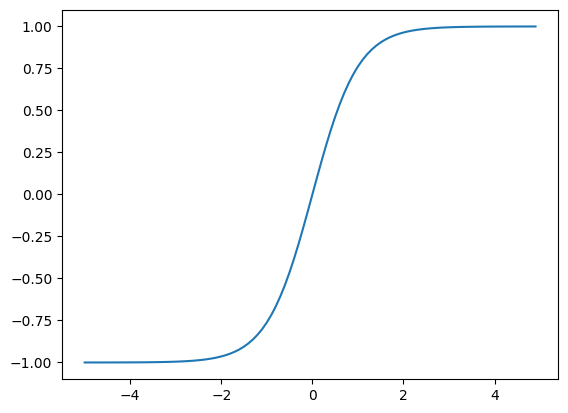

In [37]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5, 5, 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### 렐루(relu)

$f(x) = max(0, x)$



In [36]:
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-0.5250,  0.7702,  0.0972]])
tensor([[0.1535, 0.5605, 0.2860]])
tensor([1.])
